<a href="https://colab.research.google.com/github/HerlanAssis/Suport-Vector-Machine-Examples/blob/main/SVM_p03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo 03

Nesse exemplo utilizaremos um dataset para classificação de tópicos.

In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer # converte o texto em matriz e contabiliza a frequencia com que aparecem
from sklearn.feature_extraction.text import TfidfTransformer # relaciona a frequencia com que um texto 
# aparece em um documento e relaciona com a frequencia em que ele aparece em todo o documento
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC

import seaborn as sns

In [2]:
# pre processamento dos dados (realiza a limpeza do texto)
def clean_str(string):
    string = re.sub(r"\n", "", string)
    string = re.sub(r"\r", "", string)
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    
    return string.strip().lower()

In [3]:
df = pd.read_csv('/content/drive/My Drive/SVM/topics.csv')

Prévia do dataframe:

In [4]:
df.head(5)

,Unnamed: 0,question_text,question_topic
0,0,"Hi! If I sign up for your email list, can I se...",Sales/Promotions
1,1,I'm going to be out of the country for about a...,Shipping
2,2,I was wondering if you'd be able to overnight ...,Shipping
3,3,The Swingline electronic stapler (472555) look...,Shipping
4,4,I think this cosmetic bag would work great for...,Shipping


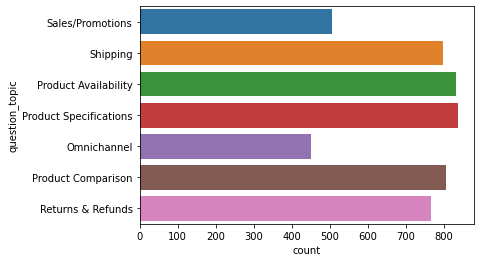

In [5]:
sns.countplot(y="question_topic", data=df)

In [6]:
X = []
for i in range(df.shape[0]):
    X.append(clean_str(df.iloc[i][1]))
y = np.array(df['question_topic'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    # ('clf', SVC(kernel="rbf", gamma=0.09, C=4.0))
    ('clf', SVC(kernel="linear", C=2.0))
])

In [21]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

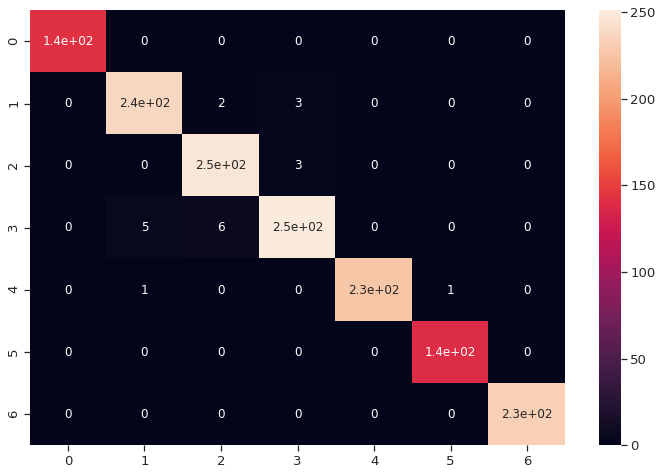

In [22]:
pred = model.predict(X_test)

# a matriz de confusão relaciona a predição do modelo com o que ele acertou/erro
c_matrix = confusion_matrix(pred, y_test)

sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, annot_kws={"size": 12})

In [23]:
accuracy_score(y_test, pred)

0.986

Este exemplo foi feito com auxílio do vídeo [SVM - Support Vector Machines: Fundamentos e prática](https://www.youtube.com/watch?v=b8nP9g0p8X4)